**What’s is a MNIST?**

It’s a 28 x 28 images of hand-written digits (0 - 9)

#Prepare datasets 

Importing the libraries 

In [1]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPool2D, Flatten
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json

Load MNIST dataset 

In [2]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train.shape, x_test.shape, y_train.shape, y_test.shape

4431872/4422102 [==============================] - 0s 0us/step


((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [3]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [4]:
y_train[0]

9

In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

Plot images

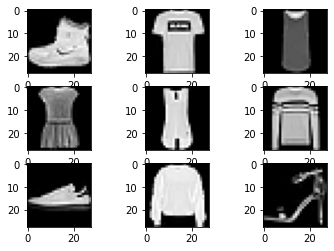

In [6]:
for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
plt.show()

Reshape to single channel

In [7]:
x_train = x_train.reshape((x_train.shape[0],28,28,1))/255
x_test = x_test.reshape((x_test.shape[0],28,28,1))/255

x_train.shape,x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [8]:
y_train_hot = tf.one_hot(y_train,depth=len(set(y_train)))
y_test_hot = tf.one_hot(y_test,depth=len(set(y_test)))

y_train_hot.shape,y_test_hot.shape

(TensorShape([60000, 10]), TensorShape([10000, 10]))

Knowing GPU type

In [9]:
! nvidia-smi

Wed Dec 15 15:18:12 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   62C    P0    71W / 149W |    151MiB / 11441MiB |      1%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

#Build model 

Model architecture 

In [35]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',input_shape=(28,28,1)))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(100,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(10,activation='softmax',name='output'))

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_1 (Dense)             (None, 100)               540900    
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
________________________________________________

model compile

In [37]:
OPT = tf.optimizers.SGD(momentum=0.9)
LOSS = tf.losses.CategoricalCrossentropy()

model.compile(optimizer=OPT,loss=LOSS,metrics=['accuracy'])

##Evaluate 

Validation 

In [38]:
x_val = x_train[:12000]
y_val = y_train_hot[:12000]

x_val.shape, y_val.shape

((12000, 28, 28, 1), TensorShape([12000, 10]))

Hyperparameter 

In [39]:
BATCH_SIZE = 32
EPOCHS = 60

**And here we go!**

In [40]:
model.fit(x=x_train,y=y_train_hot,batch_size=BATCH_SIZE,epochs=EPOCHS,validation_data=(x_val,y_val))

Epoch 1/60
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4248 - accuracy: 0.8482 - val_loss: 0.2979 - val_accuracy: 0.8922
Epoch 2/60
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2850 - accuracy: 0.8964 - val_loss: 0.2367 - val_accuracy: 0.9124
Epoch 3/60
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2459 - accuracy: 0.9095 - val_loss: 0.2063 - val_accuracy: 0.9252
Epoch 4/60
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2187 - accuracy: 0.9196 - val_loss: 0.1874 - val_accuracy: 0.9328
Epoch 5/60
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1954 - accuracy: 0.9286 - val_loss: 0.1597 - val_accuracy: 0.9406
Epoch 6/60
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1769 - accuracy: 0.9351 - val_loss: 0.1459 - val_accuracy: 0.9455
Epoch 7/60
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1595 - accuracy: 0.9416 - val_loss: 0.1329 - val_ac

In [41]:
hist_df=pd.DataFrame(model.history.history)

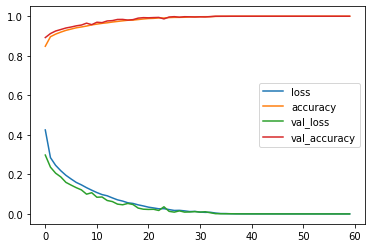

In [42]:
hist_df.plot()

In [43]:
pred = model.predict(x_test)

In [44]:
tf.argmax(pred,axis=-1)

<tf.Tensor: shape=(10000,), dtype=int64, numpy=array([9, 2, 1, ..., 8, 1, 5])>

In [45]:
accuracy = tf.reduce_mean(tf.metrics.categorical_accuracy(y_test_hot,pred))
print('accuracy', accuracy)

accuracy tf.Tensor(0.9157, shape=(), dtype=float32)


In [49]:
with open('model.json','w') as outfile:
  json.dump(model.to_json(),outfile)
  model.save_weights('mnist.h1')